In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup as bs
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
driver=webdriver.Chrome(executable_path = r'C:\Users\kunal\Downloads\chromedriver.exe')
driver.get('https://www.instagram.com/')
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot  as plt


In [3]:
def login(username,password):
    try:
        text_box1=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[1]/div/form/div[2]/div/label/input')
        ##enter username
        text_box1.send_keys(username)
        text_box2=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[1]/div/form/div[3]/div/label/input')
        ##enter password
        text_box2.send_keys(password)
        #click login in button
        driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[1]/div/form/div[4]/button/div').click()
        wait=WebDriverWait(driver,5)

        not_now_button=wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div/div/div[3]/button[2]')))
        not_now_button.click()
    except TimeoutException:
        print('wrong username or password')

In [37]:
def print_food_handles():
    driver.get('https://www.instagram.com/')
    text_box=driver.find_element_by_class_name('XTCLo')
    text_box.clear()
    text_box.send_keys('food')
    time.sleep(10)
    data1=bs(driver.page_source,'lxml')

#     wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]/div[2]')))
                                              
    l1=data1.find_all('div',class_='fuqBx')
    
    ##b represents list of all the food handles
    b=l1[0].find_all('a',class_='yCE8d')
    l=[]
    for i in b:
        n1=i['href']
        ##to not include hashtags and locations
        if('explore' not in n1):
            l.append(n1[1:-1])
    return l

In [38]:
def open_profile(handle):
    driver.get('https://www.instagram.com/')
    ##stext_bo represents the search box
    text_bo=driver.find_element_by_class_name('XTCLo')
    ##clear out any text writeen in the search box
    text_bo.clear()
    text_bo.send_keys(handle)
    ##pressing the enter key to show the insta handle
    driver.implicitly_wait(5)

    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]/div[2]/div/a[1]/div').click()
    wait=WebDriverWait(driver,5)
    wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a')))
    followers=(driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title'))
    
    return followers

In [39]:
##returns the top5 food handles with highest number of followers 
def highest():
    list_of_food_handles=print_food_handles()
    d={}
    for i in list_of_food_handles[:10]:
        followers=open_profile(i)
        followers=int(followers.replace(',',''))
        d[i]=followers
    l_sorted=sorted(d,key=d.get,reverse=True)
    l_top5=l_sorted[:5]
    return l_top5


In [40]:
##this function counts the number of posts in past 3 days
def num_of_posts_past3_days(handle):
    driver.get('https://www.instagram.com/')
    text_bo=driver.find_element_by_class_name('XTCLo')
    #clear out any text writeen in the search box
    text_bo.clear()
    #Enter the name of hadle in the text box
    text_bo.send_keys(handle)
    driver.implicitly_wait(5)
    wait=WebDriverWait(driver,5)
    
    #clicking on 1st handle in the dropdown  to show the insta handle
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]/div[2]/div/a[1]/div').click()

    #wait till 1st posts arrives 
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_2z6nI")]//div[contains(@class,"v1Nh3")]')))
    list_of_days=['1 DAY AGO','2 DAYS AGO','3 DAYS AGO']
    #count represents posts of past 3 days
    count=0
    for i in driver.find_elements_by_class_name('_9AhH0')[:10]:
        i.click()##click on post
        driver.implicitly_wait(5)
        time_info=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[2]/a/time')
        #if time_info.text is in past 3 days then count it in number of posts
        if(time_info.text in list_of_days or 'HOURS AGO' in time_info.text):
            count+=1
            
        else:
            #press the close button and break from the loop 
            driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            break
        #press the close button
        driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
    return count       


In [41]:
def scrape_content(handle):
    l=[]
    open_profile(handle)
    wait=WebDriverWait(driver,5)
    
    #clicking on 1st handle in the dropdown  to show the insta handle
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_2z6nI")]//div[contains(@class,"v1Nh3")]')))
    
    
    for i in driver.find_elements_by_class_name('_9AhH0')[:10]:
            i.click()##click on post
            driver.implicitly_wait(5)
            #a.text represents the content of a post 
            a=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span')
            l.append(a.text)
            #click on close button
            driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()

    return l


In [42]:
##returns avg_like to followers ratio
def followers_like_ratio(handle):
    followers=open_profile(handle)
    followers=followers.replace(',','')
    followers=int(followers)
    wait=WebDriverWait(driver,5)
    ##wait for 1st post to arrive 
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_2z6nI")]//div[contains(@class,"v1Nh3")]')))

    likes=[]
    from selenium.common.exceptions import NoSuchElementException
    ##for loop gives the top 10 post of the handle
    for i in driver.find_elements_by_class_name('_9AhH0')[:10]:
            i.click()##click on post
            driver.implicitly_wait(5)
            wait=WebDriverWait(driver,5)
            #We have to use try except block as if there an IGTV or Video then we have to click on the views option as done in try block
            #If it isn't an IGTV or video then in try block an exception will be raised and control will be given to except block 
            #If the control transfers to the except block then it means that it is a normal post 
            #If it is a normal post then the number of likes can be directly obtained as done in except block
            try:
                ##it is an igtv or video
                
                #we have to click on the views button
                driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span').click()
                
                #after clicking on views button number of likes will appear
                #a.text represents number of likes on that post
                a=wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[4]/span')))
                b=a.text
                b=b.replace(',','')#replace ',' by '' so that conversion into integers is easy
                likes.append(int(b))
                
                #now as we click on the views then all the buttons get deactivated 
                #So we have to click on post dialog box so that close button activates again
                driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[1]').click()
                #now click on close button to close that post
                driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            except NoSuchElementException:
                ##it is a picture or a series of picture
                
                #a.text represents the number of likes in string
                a=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span')
                b=a.text
                b=b.replace(',','')
                likes.append(int(b))
                
                #click on close button to close that post 
                driver.find_element_by_xpath('/html/body/div[4]/div[3]/button').click()
            
    #average likes for a handle is defined as the sum of likes on all top ten posts divided by 10
    avg_likes=sum(likes)/10
    
    #ratio is defined as the divison of avg_likes and the number of followers of that handle
    ratio=avg_likes/followers
    return ratio
    

In [4]:
Username=input('Pls enter your username for login: ')
Password=input('Pls enter your password for login: ')
login(Username,Password)

Pls enter your username for login: decde
Pls enter your password for login: cdcdc


KeyboardInterrupt: 

In [49]:
#Open the first 10 handles and find the top 5 which have the highest number of followers
top_5=highest()
top_5

['foodnetwork', 'buzzfeedfood', 'foodinsider', 'dilsefoodie', 'foodtalkindia']

In [51]:
#number of posts handles have done in past 3 days
d={}
for i in top_5:
    count=num_of_posts_past3_days(i)
    print(i,count)
    d[i]=count

foodnetwork 0
buzzfeedfood 0
foodinsider 4
dilsefoodie 4
foodtalkindia 6


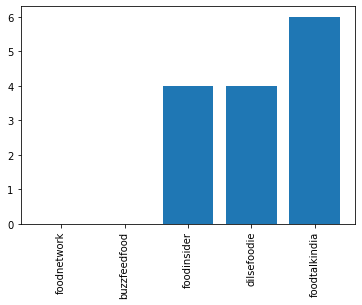

In [52]:
#graph to depict the info
import matplotlib.pyplot  as plt
count=list(d.values())
name=(d.keys())
plt.bar(name,count)
plt.xticks(rotation=90)
plt.show()

In [53]:
##Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
l=[]
top_5=['foodnetwork', 'buzzfeedfood', 'foodinsider', 'dilsefoodie', 'foodtalkindia']
for i in top_5:
    l.append(scrape_content(i))


In [54]:
l

[["Southern Bubble and Squeak\n\n@GuyFieri couldn't get enough of the pot likker gravy on this southern version of eggs Benedict at @auntmaryscafe! 🤗\n\nSettle in for a #DDD marathon beginning at 2|1c.",
  "Fire up the grill for a round of @BobbyFlay's best Turkey Burgers! 🔥🔥\n. . .\nA new grilling episode of #BeatBobbyFlay is coming up tonight @ 10|9c!\n. . .\nSave the recipe on the @FoodNetworkKitchen app.",
  "Class of the Day: Chimichurri Skirt Steak with Grilled Shishitos 🥩 Weekends are made for grilling! An herby chimichurri sauce punches up skirt steak, complemented by grilled shishito peppers in @jamesbriscione's class. Take it today on the @FoodNetworkKitchen app! #WeCook",
  'Chocolate Chip Cookies (with @thepioneerwoman) 🍪\n\nThere are lots of chocolate chip recipes out there, but trust when we say these are the ones you NEED. #WeCook\nCatch @ThePioneerWoman, Saturdays at 10a|9c.\nSave the recipe on your @FoodNetworkKitchen app.',
  "New challenge: Make @wolfiemom's Peanut B

In [61]:
#Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
#freq dictionary contains each word as key and frequency of each word as value
freq={}
for i in l:
    for j in i:
        j=j.split()
        for k in j:
            if(k in freq):
                freq[k]+=1
            else:
                freq[k]=1
list_of_all_words=list(freq.keys())
print(list_of_all_words)

['Southern', 'Bubble', 'and', 'Squeak', '@GuyFieri', "couldn't", 'get', 'enough', 'of', 'the', 'pot', 'likker', 'gravy', 'on', 'this', 'southern', 'version', 'eggs', 'Benedict', 'at', '@auntmaryscafe!', '🤗', 'Settle', 'in', 'for', 'a', '#DDD', 'marathon', 'beginning', '2|1c.', 'Fire', 'up', 'grill', 'round', "@BobbyFlay's", 'best', 'Turkey', 'Burgers!', '🔥🔥', '.', 'A', 'new', 'grilling', 'episode', '#BeatBobbyFlay', 'is', 'coming', 'tonight', '@', '10|9c!', 'Save', 'recipe', '@FoodNetworkKitchen', 'app.', 'Class', 'Day:', 'Chimichurri', 'Skirt', 'Steak', 'with', 'Grilled', 'Shishitos', '🥩', 'Weekends', 'are', 'made', 'grilling!', 'An', 'herby', 'chimichurri', 'sauce', 'punches', 'skirt', 'steak,', 'complemented', 'by', 'grilled', 'shishito', 'peppers', "@jamesbriscione's", 'class.', 'Take', 'it', 'today', 'app!', '#WeCook', 'Chocolate', 'Chip', 'Cookies', '(with', '@thepioneerwoman)', '🍪', 'There', 'lots', 'chocolate', 'chip', 'recipes', 'out', 'there,', 'but', 'trust', 'when', 'we', '

In [62]:
print(freq)

{'Southern': 1, 'Bubble': 1, 'and': 62, 'Squeak': 1, '@GuyFieri': 1, "couldn't": 1, 'get': 3, 'enough': 1, 'of': 34, 'the': 88, 'pot': 2, 'likker': 1, 'gravy': 1, 'on': 20, 'this': 10, 'southern': 2, 'version': 2, 'eggs': 1, 'Benedict': 1, 'at': 7, '@auntmaryscafe!': 1, '🤗': 1, 'Settle': 1, 'in': 47, 'for': 39, 'a': 43, '#DDD': 1, 'marathon': 1, 'beginning': 1, '2|1c.': 1, 'Fire': 1, 'up': 7, 'grill': 1, 'round': 1, "@BobbyFlay's": 1, 'best': 6, 'Turkey': 1, 'Burgers!': 1, '🔥🔥': 1, '.': 49, 'A': 1, 'new': 5, 'grilling': 1, 'episode': 3, '#BeatBobbyFlay': 1, 'is': 22, 'coming': 1, 'tonight': 1, '@': 2, '10|9c!': 1, 'Save': 4, 'recipe': 8, '@FoodNetworkKitchen': 6, 'app.': 4, 'Class': 1, 'Day:': 2, 'Chimichurri': 1, 'Skirt': 1, 'Steak': 1, 'with': 27, 'Grilled': 1, 'Shishitos': 1, '🥩': 1, 'Weekends': 1, 'are': 12, 'made': 2, 'grilling!': 1, 'An': 2, 'herby': 1, 'chimichurri': 1, 'sauce': 4, 'punches': 1, 'skirt': 1, 'steak,': 1, 'complemented': 1, 'by': 6, 'grilled': 2, 'shishito': 1, 'p

In [64]:
#Create a csv file with two columns : the word and its frequency
import csv
import pandas as pd
w = pd.DataFrame({'Words':list(freq.keys()), 'freq':list(freq.values())})
w.to_csv('words.csv')

In [66]:
#Now, find the hashtags that were most popular among these bloggers
#d2 dictionary contains hashtags only from freq dictionary
d2={}
for i in freq:
#     print(i)
    if(i[0]=='#'):
        d2[i]=freq[i]
#sort the dictionary according to their values and then return a list of keys in reverse sorted order
l2=sorted(d2,key=d2.get,reverse=True)
for i in l2:
    print(i,d2[i])

#dilsefoodie 10
#FoodInsider 6
#WorstCooks 4
#food 4
#WeCook 3
#cheeseburger 2
#chicken 2
#LA 2
#losangeles 2
#nyc 2
#DDD 1
#BeatBobbyFlay 1
#WhatWouldKatieEat: 1
#bringme 1
#portlandtravel 1
#sushirestuarant 1
#sushi 1
#oregontravel 1
#sustainability 1
#foodies 1
#baking 1
#diy 1
#burger 1
#cheezeborger 1
#friedchicken 1
#pancakes 1
#breakfast 1
#nycfoodies 1
#cookies 1
#bakingfromscratch 1
#dessert⁣ 1
#deli 1
#katzsdeli 1
#katzs 1
#pastrami 1
#pastramionrye 1
#nyeats 1
#legendaryeats 1
#PolloTropical 1
#Florida 1
#foodart 1
#soapmaker 1
#soapdesign⁣ 1
#pizza 1
#Chicago 1
#LouMalnatis 1
#chicagopizza 1
#bamboo 1
#biryani 1
#odisha 1
#virtualiftaar 1
#nagpur 1
#muttoncurry 1
#mughlaifood 1
#daltadka 1
#mangoweek 1
#butterchicken 1
#QuarantineFoodDelivery 1
#OrderSafely 1
#KitchenHacks 1
#KeepCookiesFresh 1
#BIWCamp 1
#Badarpur, 1
#Gautampuri, 1
#Tughlakabadvillage, 1
#shaktivihar. 1


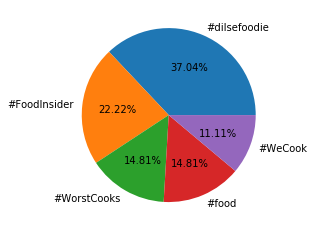

[10, 6, 4, 4, 3]


In [68]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
#label contains top 5 hashtags
label=[]
#size contains the count of hashtags in the posts scraped
size=[]
for i in l2[:5]:
    size.append(d2[i])
    label.append(i)
plt.pie(size,labels=label,autopct='%.2f%%')
plt.show()

In [30]:
#You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
Ratio=[]
for i in top_5:
    ratio=followers_like_ratio(i)
    time.sleep(5)
    Ratio.append(ratio)
    print(ratio)

0.001638185592611994
0.001493018437643598
0.004942716452058899
0.0173920487230293
0.001793664238522785


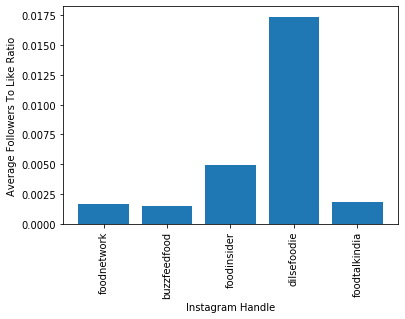

In [32]:
#Create a bar graph to depict the above obtained information.
plt.bar(top_5,Ratio)
plt.xticks(rotation=90)
plt.xlabel('Instagram Handle')
plt.ylabel('Average Followers To Like Ratio')
plt.show()